In [65]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt


def draw_img(num: int, title: str, img):
    plt.figure(figsize=(100, 130))
    plt.subplot(1, 1, num)
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray")
    
def show(title, img):
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def de_duplication(list_rect):
    rst = []
    for left, right in list_rect:
        if not rst:
            rst.append((left, right))
        elif abs(left[0] - rst[-1][0][0]) > 10 or abs(left[1] - rst[-1][0][1]) > 10:
            rst.append((left, right))
    return rst

# methods in ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
def match(method, threshold, template, img):
    img_rgb = img
    
    if len(template.shape) == 3:
        template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    img_gray = img
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img_gray,template,method)
#     threshold = 0.8
    #umpy.where(condition[, x, y])
    #Return elements, either from x or y, depending on condition. #If only condition is given, return condition.nonzero().
    loc = np.where( res >= threshold)
    rst = []
    for pt in zip(*loc[::-1]):
        rst.append((pt, (pt[0] + w, pt[1] + h)))
#     show("", img_rgb)
    if rst:
        rst = de_duplication(rst)
        for left, right in rst:
            cv2.rectangle(img_rgb, left, right, (0,0,255), 2)
    return rst

## 原图匹配

In [19]:
img = cv2.imread("images/20211219154529.png")
print(img.shape)

tbase = "images/template/"
for i in os.listdir(tbase):
    path = tbase + i
    t_img = cv2.imread(path)
    rst = match(cv2.TM_CCOEFF_NORMED, 0.9, t_img, img)
    if rst:
        if i == "plant.png":
            print(rst)
        print(f"{i} 匹配数目: {len(rst)}")
show("source", img)

(900, 1600, 3)
[((613, 375), (639, 400)), ((800, 386), (826, 411)), ((801, 386), (827, 411))]
plant.png 匹配数目: 3
dusk.png 匹配数目: 1
mech.png 匹配数目: 2
reptile.png 匹配数目: 1


## 720匹配

(900, 1600, 3)
plant.png 匹配数目: 2
aquatic.png 匹配数目: 4
endturn.png 匹配数目: 1
3.png 匹配数目: 1
(400, 231) (421, 251)
(819, 310) (840, 330)
(221, 231) (242, 251)
(998, 310) (1019, 330)
(908, 391) (929, 411)
(220, 392) (241, 412)
(1116, 490) (1252, 532)
(33, 565) (68, 596)


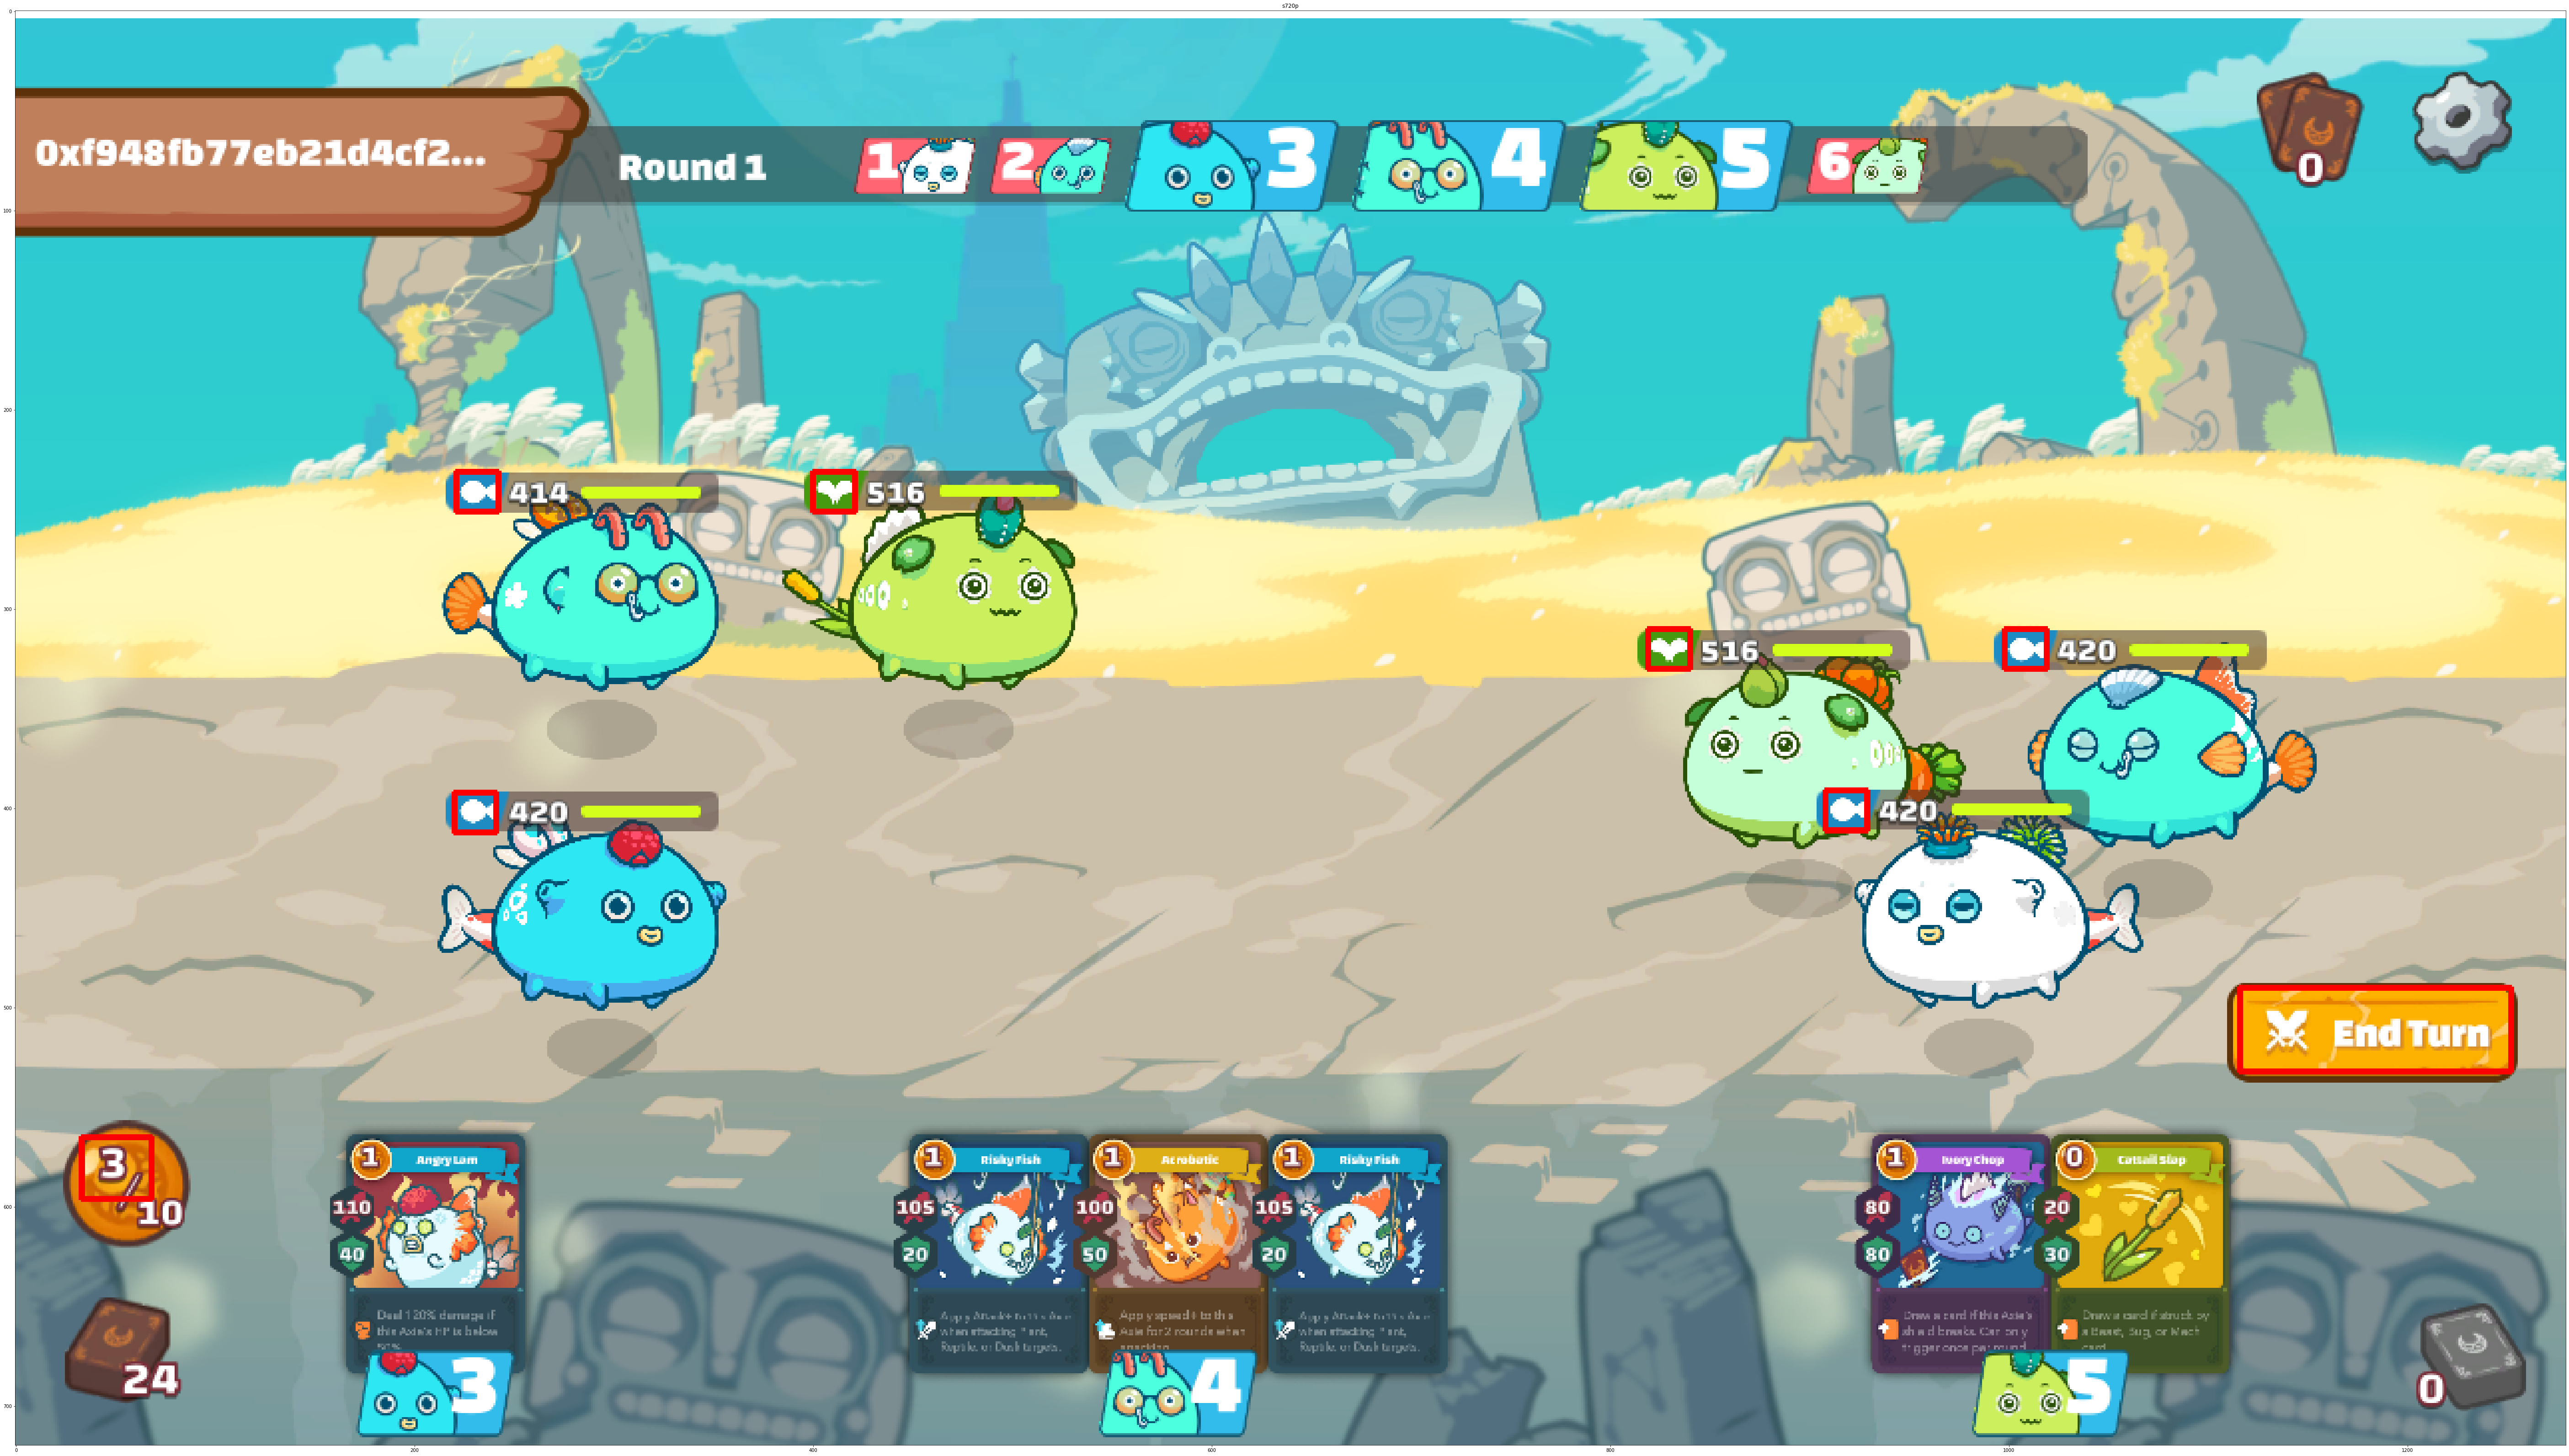

In [66]:
img_720p = cv2.imread("images/1280x720.png")
hight, width, deep = img_720p.shape
rate = 900/hight
if rate != 1600/width:
    print("非标准分辨率.")
    
img_t900p = cv2.resize(img_720p, (1600, 900))
# show("img_t900p", img_t900p)
print(img_t900p.shape)

match_rst = []
tbase = "images/template/"
for i in os.listdir(tbase):
    path = tbase + i
    t_img = cv2.imread(path)
    rst = match(cv2.TM_CCOEFF_NORMED, 0.9, t_img, img_t900p)
    if rst:
        print(f"{i} 匹配数目: {len(rst)}")
        match_rst += rst
        
show("t900p", img_t900p)

for left, right in match_rst:
    left = (int(left[0]//rate), int(left[-1]//rate))
    right = (int(right[0]//rate), int(right[-1]//rate))
    print(left, right)
    cv2.rectangle(img_720p,  left, right, (0,0,255), 2)
    
draw_img(1, "s720p", img_720p)